### CS4423 - Networks
Angela Carnevale<br />
School of Mathematical and Statistical Sciences<br />
NUI Galway

# Assignment 2

Provide answers to the problems in the boxes provided.  

The buttons at the top of the page can be used to **create
more boxes if needed**.
The type of box can be changed from `Code` to `Markdown`.
`Code` boxes take (and execute) `python` code.
`Markdown` boxes take (and format nicely) **text input**.
In this way, you can provide answers, ask questions, 
or raise issues, in words.

When finished, please print this notebook into a **pdf** file and submit this to
**Blackboard**.

**Deadline.** Thursday 3 March at 5pm. 

## Setup

This is a `jupyter` notebook.   You can open and interact
with the notebook through one of sites recommended at
its [github](https://github.com/angelacarnevale/2122-CS4423-Networks) repository.

Or, you can
install and use `jupyter` as a `python` package on your own laptop or PC.  

The following command loads the `networkx` package into the current session.  
The next command specifies some standard options that can be useful for drawing graphs.  

In order to execute the code in a box,
use the mouse or arrow keys to highlight the box and then press SHIFT-RETURN.

In [5]:
import networkx as nx
import pandas as pd ## can be used to visualise data arising from computing centrality measures
from queue import Queue
opts = { "with_labels": True, "node_color": 'y' }

Should it ever happen that the notebook becomes unusable, start again with a fresh copy.

## 1. Breadth First Search.

Breadth First Search (BFS) is a versatile and efficient strategy for systematically visiting
all the nodes in a graph.

Given a graph $G = (X, E)$ and a starting point $x \in X$, BFS can be described as the following sequence of steps.

1. mark all nodes of $G$ as "unseen".

2. initialize a list `seen = [x]` and mark `x` as seen.

3. loop over the elements `y` in the list `seen` and, in each step, visit the
   node `y` and add all of `y`'s neighbors that have not been marked as "seen"
   to the list `seen` and mark them as seen.


### For Example

Consider the graph on the vertex set `"ABCDEFGHIJ"`
defined in the nearby file `data/bfs.adj` by adjacency lists.

In [6]:
G = nx.read_adjlist("bfs.adj")
nx.draw(G, **opts)

FileNotFoundError: [Errno 2] No such file or directory: 'bfs.adj'

Let's say we want to start exploring the graph at vertex `'A'`

In [ ]:
x = 'A'

**Step 1.** For each of its nodes `x`, the graph object `G` maintains in `G.nodes[x]` a `python` dictionary
that can be used store arbitrary attributes of the nodes.  We can use it for an attribute `'seen'`,
which is set to `True` or `False`, depending on whether the node has already been seen by this instance 
of BFS, or not.  Initially it would be set to `False` for all nodes.

In [ ]:
G.nodes[x]

In [ ]:
for y in G:
    G.nodes[y]['seen'] = False

**Step 2.** Initialize a `python` list `seen` to contain `x` only, and set `x`'s `'seen'` attribute to `True`.

In [ ]:
seen = [x]
G.nodes[x]['seen'] = True

**Step 3.**  The loop over `seen`.  For each node `y` in the list, print `y`, then
add all of `y`'s unseen neighbors to the end of the list `seen` and mark them
as `"seen"`.  Note how the list `seen` initially has only one element, but grows
over time, until no more new nodes are detected.  
The loop automatically terminates when the end of the list `seen` has been reached.

In [ ]:
for y in seen:
    print(y)
    for z in G.neighbors(y):
        if not G.nodes[z]['seen']:
            seen.append(z)
            G.nodes[z]['seen'] = True

In a variant of the same BFS strategy, on can construct a tree on the vertex set $X$ that
records the history of how the nodes in the graph $G$ were discovered.

In [ ]:
x = 'A'

We set up an empty graph `T` to eventually contain the tree.

In [ ]:
T = nx.Graph()

From here it's essentially the same procedure as above ...

In [ ]:
for y in G:
    G.nodes[y]['seen'] = False

... except that we need to add the initial vertex `x` to `T` ...

In [3]:
T.add_node(x)
seen = [x]
G.nodes[x]['seen'] = True

NameError: name 'T' is not defined

... and instead of printing `y`, we add the edges leading to `y`'s children to the tree `T`.

In [4]:
for y in seen:
    for z in G.neighbors(y):
        if not G.nodes[z]['seen']:
            T.add_edge(y, z)
            seen.append(z)
            G.nodes[z]['seen'] = True

NameError: name 'seen' is not defined

The resulting tree `T` is called a **spanning tree** of the graph `G`.

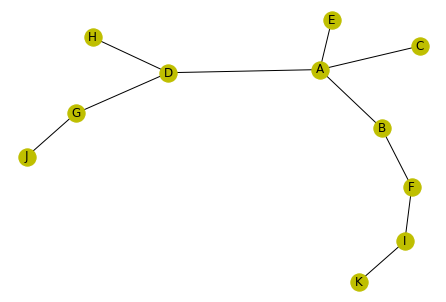

In [13]:
nx.draw(T, **opts)

## Tasks

1. Print out all the nodes of $G$ as discovered when the starting point is node `H`.
2. Construct a spanning tree of the graph `G` with node `H` as starting point.
3. Repeat 1 and 2 for one more starting node.

### Question 1

In [14]:
x = 'H'
for y in G:
    G.nodes[y]['seen'] = False
seen = [x]
G.nodes[x]['seen'] = True

for y in seen:
    print(y)
    for z in G.neighbors(y):
        if not G.nodes[z]['seen']:
            seen.append(z)
            G.nodes[z]['seen'] = True

H
D
E
J
A
G
K
B
C
I
F


### Question 2

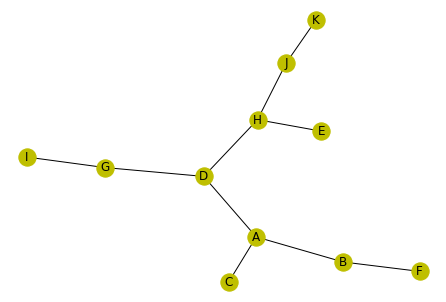

In [15]:
T = nx.Graph()
for y in G:
    G.nodes[y]['seen'] = False
    
T.add_node(x)
seen = [x]
G.nodes[x]['seen'] = True

for y in seen:
    for z in G.neighbors(y):
        if not G.nodes[z]['seen']:
            T.add_edge(y, z)
            seen.append(z)
            G.nodes[z]['seen'] = True
nx.draw(T, **opts)

### Question 3

In [16]:
x = 'F'
for y in G:
    G.nodes[y]['seen'] = False
seen = [x]
G.nodes[x]['seen'] = True

for y in seen:
    print(y)
    for z in G.neighbors(y):
        if not G.nodes[z]['seen']:
            seen.append(z)
            G.nodes[z]['seen'] = True

F
B
C
I
A
G
K
D
E
J
H


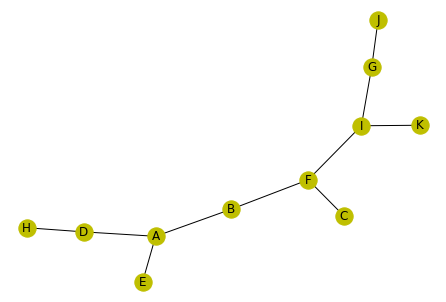

In [17]:
T = nx.Graph()
for y in G:
    G.nodes[y]['seen'] = False
    
T.add_node(x)
seen = [x]
G.nodes[x]['seen'] = True

for y in seen:
    for z in G.neighbors(y):
        if not G.nodes[z]['seen']:
            T.add_edge(y, z)
            seen.append(z)
            G.nodes[z]['seen'] = True
nx.draw(T, **opts)

... you can write your comments in this box ...

## 2.  The Counties of Ireland.

Define a graph `I` on the $32$ counties of Ireland by
joining two counties whenever they have a common border.

A list of counties and their borders in the adjacency list format
can be found in the nearby file `data/ireland.adj`. Please
let me know if something doesn't look right!

Remember, you can construct the graph `I` directly from the adjacency list.

## Tasks 

* What are the order and the size of the resulting graph?

Size: 76 Order: 32


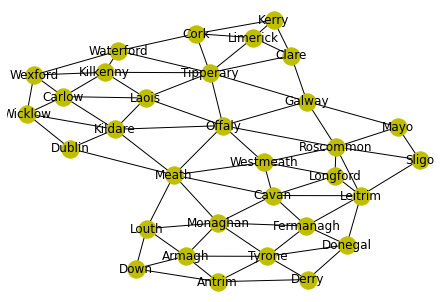

In [18]:
G = nx.read_adjlist("ireland.adj")
nx.draw(G, **opts)
print('Size:',G.size(),'Order:',G.order())

... your comments here...

* In terms of centrality measures, what are the $3$ most central counties, for

    1.  degree centrality?
    1.  eigenvector centrality?
    1.  closeness centrality?
    1.  betweenness centrality?

Please use as many code and as many text cells as needed and make sure to respond to each point.

In [28]:
#Degree Centrality
degree_cen = nx.degree_centrality(G)
nx.set_node_attributes(G, degree_cen, '$C_i^D$')

pd.DataFrame.from_dict(
 dict(G.nodes(data=True)),
 orient='index'
).sort_values('$C_i^D$', ascending=False)

,degree,$C_i^D$
A,4,0.571429
E,4,0.571429
F,4,0.571429
G,4,0.571429
H,4,0.571429
B,4,0.571429
C,4,0.571429
D,4,0.571429


According to degree centrality. Tipperary, Roscommon and Offaly are the 3 most central counties. (Meath is also seen as being as central as Roscommon and Offaly)

In [20]:
#Eigenvector Centrality
eigen_cen = nx.eigenvector_centrality(G)
nx.set_node_attributes(G, eigen_cen, '$C_i^E$')

pd.DataFrame.from_dict(
 dict(G.nodes(data=True)),
 orient='index'
).sort_values('$C_i^E$', ascending=False)

,degree,$C_i^E$
Offaly,7,0.327506
Meath,7,0.289622
Roscommon,7,0.266327
Tipperary,8,0.258747
Cavan,6,0.250965
Westmeath,5,0.250843
Kildare,6,0.234722
Laois,5,0.217561
Monaghan,6,0.209616
Leitrim,6,0.209394


According to eigenvector centality, Offaly, Meath and Roscommon are seen as the 3 most central counties. 

In [21]:
#Closeness Centrality
close_cen = nx.closeness_centrality(G)
nx.set_node_attributes(G, close_cen, '$C_i^C$')

pd.DataFrame.from_dict(
 dict(G.nodes(data=True)),
 orient='index'
).sort_values('$C_i^C$', ascending=False)

,degree,$C_i^E$,$C_i^C$
Offaly,7,0.327506,0.469697
Meath,7,0.289622,0.455882
Roscommon,7,0.266327,0.413333
Kildare,6,0.234722,0.407895
Westmeath,5,0.250843,0.407895
Galway,5,0.205811,0.402597
Tipperary,8,0.258747,0.397436
Monaghan,6,0.209616,0.387500
Cavan,6,0.250965,0.387500
Laois,5,0.217561,0.382716


According to closeness centrality, Offaly, Meath and Roscommon are seen as the 3 most central counties. 

In [22]:
#Betweenness Centrality
betwe_cen = nx.betweenness_centrality(G)
nx.set_node_attributes(G, betwe_cen, '$C_i^B$')

pd.DataFrame.from_dict(
 dict(G.nodes(data=True)),
 orient='index'
).sort_values('$C_i^B$', ascending=False)

,degree,$C_i^E$,$C_i^C$,$C_i^B$
Meath,7,0.289622,0.455882,0.308805
Offaly,7,0.327506,0.469697,0.279330
Tipperary,8,0.258747,0.397436,0.222681
Roscommon,7,0.266327,0.413333,0.162350
Monaghan,6,0.209616,0.387500,0.132825
Leitrim,6,0.209394,0.373494,0.120198
Kildare,6,0.234722,0.407895,0.116354
Galway,5,0.205811,0.402597,0.113614
Louth,4,0.128441,0.356322,0.082710
Tyrone,6,0.142125,0.319588,0.065503


According to betweenness centrality, Meath, Offaly and Tipperary are the 3 most central counties. 

## 3. Constructing examples.

## Tasks

1. Give an example of a graph on 8 vertices all of which have degree centrality equal to 4. For such graph,  also compute the normalised eigenvector, closeness and betweenness centralities. What do you observe? (E.g., do you need to compute these measures for all 8 nodes?)
1. Determine the normalised degree centrality of the nodes in some
   random trees.  What do you observe? E.g., is there some function of the degree centrality that is constant across your examples?
1. Give an example of a graph on $n=6,7,8$ vertices which has a _unique_ node that is highest ranked with respect to normalised degree, closeness and betweenness centrality. Is that unique node also highest ranked with respect to eigenvector centrality? Can you think of such an example for any $n$? 

### Question 1

In [7]:
G = nx.Graph(['AE','AF','AG','AH','BE','BF','BG','BH','CE','CF','CG','CH','DE','DF','DG','DH'])
dict(G.degree())

{'A': 4, 'E': 4, 'F': 4, 'G': 4, 'H': 4, 'B': 4, 'C': 4, 'D': 4}

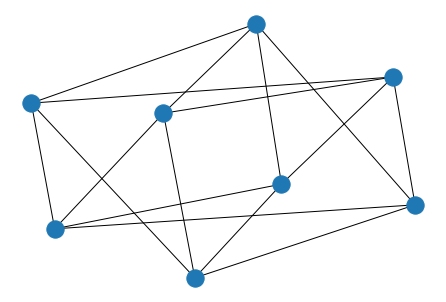

In [9]:
nx.draw(G)

In [10]:
nx.eigenvector_centrality(G)

{'A': 0.35355339059327373,
 'E': 0.35355339059327373,
 'F': 0.35355339059327373,
 'G': 0.35355339059327373,
 'H': 0.35355339059327373,
 'B': 0.35355339059327373,
 'C': 0.35355339059327373,
 'D': 0.35355339059327373}

In [11]:
nx.closeness_centrality(G)

{'A': 0.7,
 'E': 0.7,
 'F': 0.7,
 'G': 0.7,
 'H': 0.7,
 'B': 0.7,
 'C': 0.7,
 'D': 0.7}

In [36]:
nx.betweenness_centrality(G)

{'A': 0.07142857142857142,
 'E': 0.07142857142857142,
 'F': 0.07142857142857142,
 'G': 0.07142857142857142,
 'H': 0.07142857142857142,
 'B': 0.07142857142857142,
 'C': 0.07142857142857142,
 'D': 0.07142857142857142}

As every vertex is essentially the same i.e. same degree, they will all have the same values for each of the normalised eigenvector, closeness and betweenness centralities. Therefore there is no need to compute these measures for all 8 nodes as each of these nodes are seen as being equally important. 

### Question 2

In [23]:
rt1 = nx.random_tree(5)
rt2 = nx.random_tree(8)
rt3 = nx.random_tree(13)
nx.degree_centrality(rt1)

{0: 0.25, 1: 0.25, 2: 0.5, 3: 0.25, 4: 0.75}

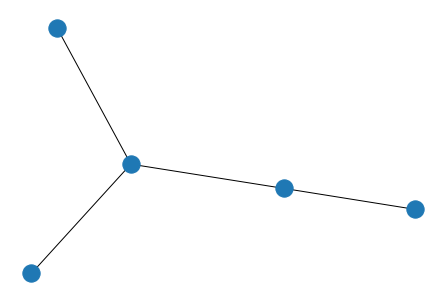

In [26]:
nx.draw(rt1)

In [24]:
nx.degree_centrality(rt2)

{0: 0.2857142857142857,
 1: 0.14285714285714285,
 2: 0.2857142857142857,
 3: 0.2857142857142857,
 4: 0.14285714285714285,
 5: 0.2857142857142857,
 6: 0.42857142857142855,
 7: 0.14285714285714285}

In [25]:
nx.degree_centrality(rt3)

{0: 0.08333333333333333,
 1: 0.16666666666666666,
 2: 0.08333333333333333,
 3: 0.08333333333333333,
 4: 0.08333333333333333,
 5: 0.3333333333333333,
 6: 0.08333333333333333,
 7: 0.25,
 8: 0.08333333333333333,
 9: 0.08333333333333333,
 10: 0.16666666666666666,
 11: 0.3333333333333333,
 12: 0.16666666666666666}

For the degree centralities for each of the random trees the first two centrality values are the same in all three of the random trees. 

### Question 3

{'A': 0.2, 'B': 0.8, 'C': 0.2, 'D': 0.4, 'E': 0.2, 'F': 0.2} 
 {'A': 0.5, 'B': 0.8333333333333334, 'C': 0.5, 'D': 0.625, 'E': 0.4166666666666667, 'F': 0.5} 
 {'A': 0.0, 'B': 0.9, 'C': 0.0, 'D': 0.4, 'E': 0.0, 'F': 0.0} 
 {'A': 0.32625975412584113, 'B': 0.6767657319837914, 'C': 0.32625975412584113, 'D': 0.42504554868198824, 'E': 0.2049100877734122, 'F': 0.32625975412584113}


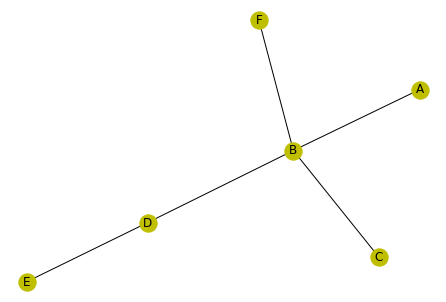

In [63]:
#n=6
G_6 = nx.Graph(['AB','BC','BD','DE','BF'])
nx.draw(G_6, **opts)
print(nx.degree_centrality(G_6),'\n',nx.closeness_centrality(G_6),'\n',nx.betweenness_centrality(G_6),'\n',nx.eigenvector_centrality(G_6))

As we can see the graph above has a unique node (B) that is highest ranked with respect to degree centrality, closeness centrality, betweenness centrality and also eigenvector centrality. 

{'A': 0.4, 'B': 0.8, 'C': 0.4, 'D': 0.4, 'E': 0.2, 'F': 0.2} 
 {'A': 0.5555555555555556, 'B': 0.8333333333333334, 'C': 0.5555555555555556, 'D': 0.625, 'E': 0.4166666666666667, 'F': 0.5} 
 {'A': 0.0, 'B': 0.8, 'C': 0.0, 'D': 0.4, 'E': 0.0, 'F': 0.0} 
 {'A': 0.4553174596649911, 'B': 0.6282837873958201, 'C': 0.4553174596649911, 'D': 0.3206056179344952, 'E': 0.13471613776235838, 'F': 0.26399830362946686}


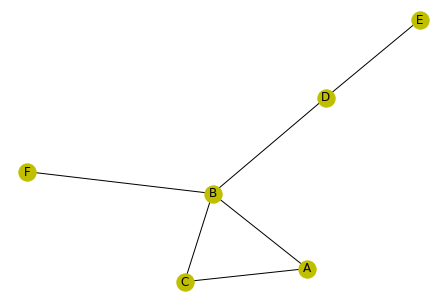

In [65]:
#n=7
G_7 = nx.Graph(['AB','BC','BD','DE','BF','BF','AC'])
nx.draw(G_7, **opts)
print(nx.degree_centrality(G_7),'\n',nx.closeness_centrality(G_7),'\n',nx.betweenness_centrality(G_7),'\n',nx.eigenvector_centrality(G_7))

As we can see the graph above has a unique node (B) that is highest ranked with respect to degree centrality, closeness centrality, betweenness centrality and also eigenvector centrality. 

{'A': 0.3333333333333333, 'B': 0.6666666666666666, 'C': 0.3333333333333333, 'D': 0.5, 'E': 0.16666666666666666, 'F': 0.3333333333333333, 'G': 0.3333333333333333} 
 {'A': 0.5, 'B': 0.75, 'C': 0.5, 'D': 0.6666666666666666, 'E': 0.42857142857142855, 'F': 0.5454545454545454, 'G': 0.5} 
 {'A': 0.0, 'B': 0.6, 'C': 0.0, 'D': 0.43333333333333335, 'E': 0.0, 'F': 0.1, 'G': 0.06666666666666667} 
 {'A': 0.3724252260262819, 'B': 0.5807504219307099, 'C': 0.3724252260262819, 'D': 0.40139150713527694, 'E': 0.15683296114928075, 'F': 0.3401130115052203, 'G': 0.28972274534029446}


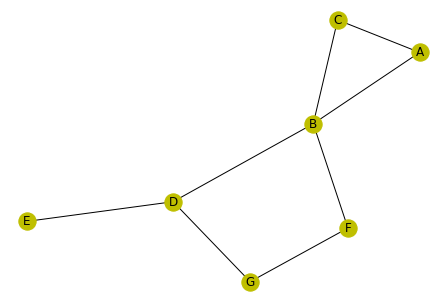

In [67]:
#n=8
G_8 = nx.Graph(['AB','BC','BD','DE','BF','BF','AC','GF','GD'])
nx.draw(G_8, **opts)
print(nx.degree_centrality(G_8),'\n',nx.closeness_centrality(G_8),'\n',nx.betweenness_centrality(G_8),'\n',nx.eigenvector_centrality(G_8))

As we can see the graph above has a unique node (B) that is highest ranked with respect to degree centrality, closeness centrality, betweenness centrality and also eigenvector centrality. 